In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'C://Users//saite//OneDrive//Desktop//ElectricCarData_Clean.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
# Select relevant features
features = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

In [11]:
print(df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH']].dtypes)


AccelSec          float64
TopSpeed_KmH        int64
Range_Km            int64
FastCharge_KmH     object
dtype: object


In [12]:
df['AccelSec'] = pd.to_numeric(df['AccelSec'], errors='coerce')
df['TopSpeed_KmH'] = pd.to_numeric(df['TopSpeed_KmH'], errors='coerce')
df['Range_Km'] = pd.to_numeric(df['Range_Km'], errors='coerce')
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')


In [13]:
print(df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH']].dtypes)

AccelSec          float64
TopSpeed_KmH        int64
Range_Km            int64
FastCharge_KmH    float64
dtype: object


In [14]:
df = df.dropna(subset=['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH'])


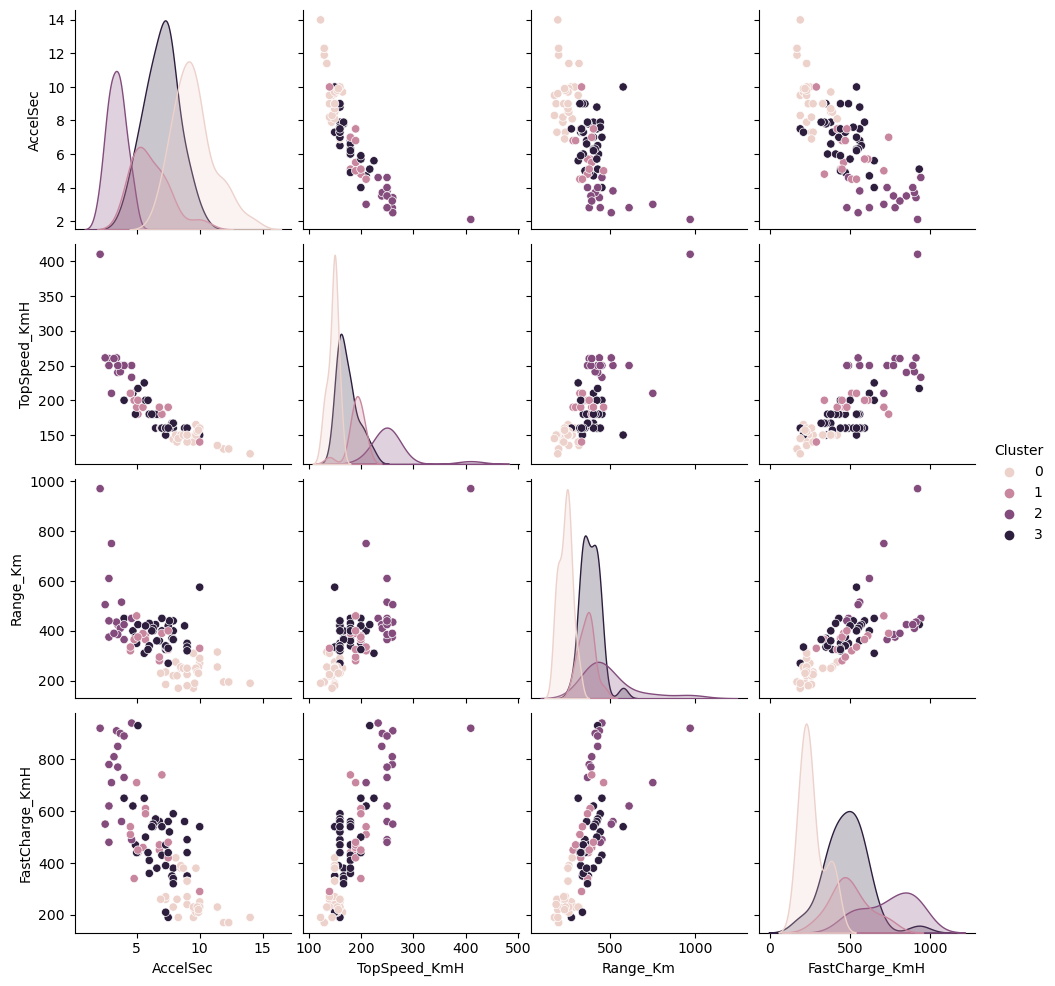

In [15]:
sns.pairplot(df, hue='Cluster', vars=['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'FastCharge_KmH'])
plt.show()
